# 6.2.4 Independent Component Analysis (ICA)

## Explanation of Independent Component Analysis (ICA)

Independent Component Analysis (ICA) is a computational method for separating a multivariate signal into additive, independent components. This technique is a type of blind source separation and is commonly used in signal processing, neuroscience, and machine learning.

### Key Concepts

- **Independence**: ICA assumes that the source signals are statistically independent.
- **Non-Gaussianity**: ICA relies on the assumption that the sources are non-Gaussian; the more non-Gaussian the sources, the easier they are to separate.
- **Mixing Matrix**: The observed signals are assumed to be linear mixtures of the independent components.

___
___

### Algorithm

1. **Centering**: Subtract the mean of each observed signal.
2. **Whitening**: Transform the centered data so that its components are uncorrelated and have unit variance.
3. **ICA Iteration**: Use an iterative method (e.g., FastICA) to find the matrix that maximizes the statistical independence of the estimated components.

___
___
### Readings:
- [Introduction to ICA: Independent Component Analysis](https://towardsdatascience.com/introduction-to-ica-independent-component-analysis-b2c3c4720cd9)
- [What Is Independent Component Analysis (ICA)?](https://www.baeldung.com/cs/independent-component-analysis)
- [Independent Component Analysis (ICA)](https://readmedium.com/en/https:/towardsdatascience.com/independent-component-analysis-ica-a3eba0ccec35)
- [Independent component analysis: An introduction - Alaa Tharwat](https://www.emerald.com/insight/content/doi/10.1016/j.aci.2018.08.006/full/pdf?title=independent-component-analysis-an-introduction)
- [Independent Component Analysis: A Tutorial - John Hopkins University (pdf)](https://www.cs.jhu.edu/~ayuille/courses/Stat161-261-Spring14/HyvO00-icatut.pdf)
___
___

## Scenarios Where ICA is Applicable

1. **Blind Source Separation**: Separating audio signals from a mixture, such as different speakers speaking simultaneously (the "cocktail party problem").
2. **Feature Extraction**: Extracting meaningful features from complex datasets, particularly in image and video processing.
3. **Neuroscience**: Analyzing brain signals like EEG or fMRI to separate underlying neural sources.
4. **Financial Data**: Identifying independent factors affecting financial markets from observed data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from sklearn.datasets import make_blobs

In [2]:
# Generate synthetic data
np.random.seed(42)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Generate source signals
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

In [3]:
# Mix the signals
A = np.array([[1, 1], [0.5, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Observed signals

In [4]:
# Apply ICA
ica = FastICA(n_components=2, random_state=42)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

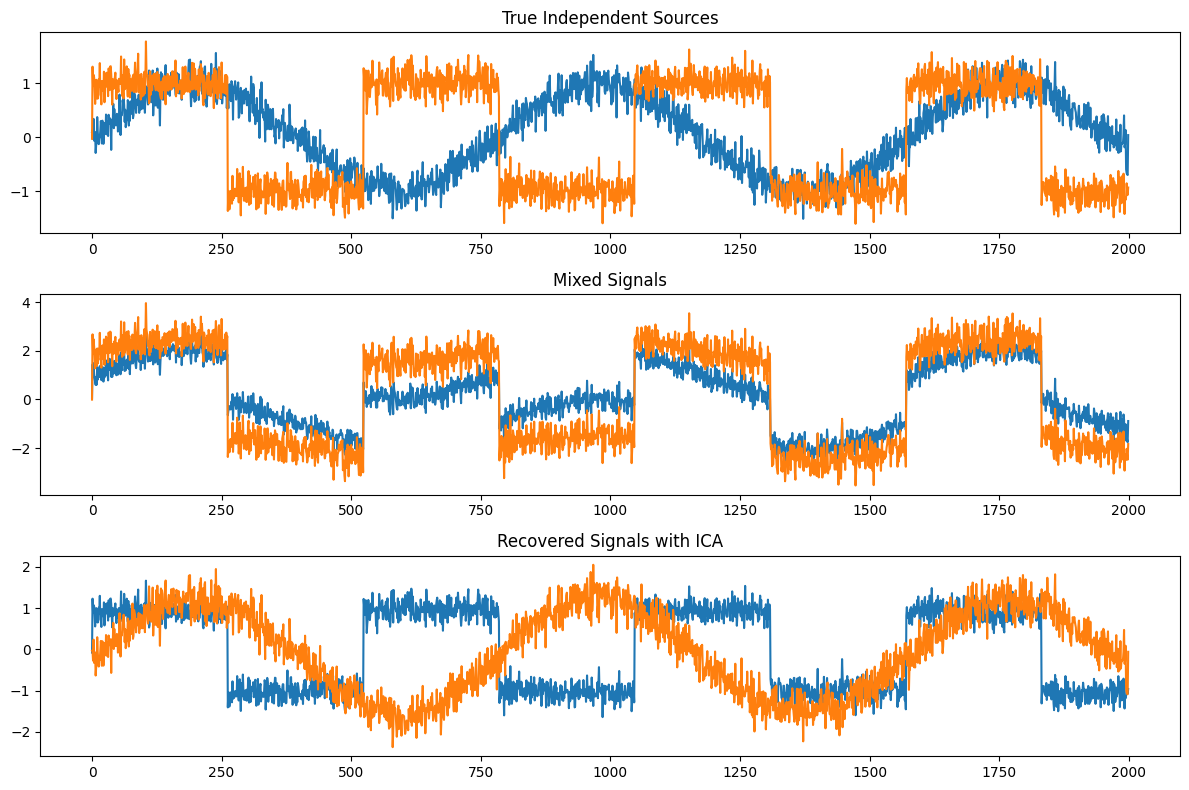

In [5]:
# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('True Independent Sources')
plt.plot(S)

plt.subplot(3, 1, 2)
plt.title('Mixed Signals')
plt.plot(X)

plt.subplot(3, 1, 3)
plt.title('Recovered Signals with ICA')
plt.plot(S_)


plt.tight_layout()
plt.show()

## Conclusion

Independent Component Analysis (ICA) is a powerful technique for separating a multivariate signal into independent, non-Gaussian components. It is widely used in fields such as signal processing, neuroscience, and financial analysis for tasks like blind source separation and feature extraction.

### Key Points

- **Independence and Non-Gaussianity**: ICA exploits the statistical independence and non-Gaussian nature of source signals to achieve separation.
- **Versatile Applications**: ICA is applicable in diverse areas including audio signal separation, neuroscience, image processing, and finance.
- **Effective Signal Separation**: The method effectively separates mixed signals into their original independent components, as demonstrated by the separation of synthetic mixed signals in the example.

The Python implementation using the FastICA algorithm demonstrates how ICA can recover original source signals from observed mixed signals, illustrating its practical utility and effectiveness.
